이번 과제는 **KNN 알고리즘**과 **K-Means 알고리즘**을 활용하여 데이터를 분석하는 것입니다.

과제는 두 가지 파트로 나누어져 있습니다:

#### 1. KNN 알고리즘 구현 및 분석
- 주어진 데이터셋을 로드한 후, 전처리와 EDA을 수행하세요.
  - [데이터 다운받기 : diabetes](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)
- KNN 알고리즘을 구현하고, 하이퍼파라미터 튜닝을 통해 최적의 성능을 내는 모델을 구축해 보세요.
  - 다양한 distance metric을 사용해보세요.
- 모델의 성능을 평가한 뒤, 다양한 지표를 사용해 결과를 해석하세요.
- 추가적으로 Weighted KNN과 같은 변형된 알고리즘도 적용해 보세요 :)

#### 2. K-Means 알고리즘 구현 및 분석
- 주어진 데이터셋을 로드한 후, 전처리와 EDA을 수행하세요.
  - [데이터 다운받기 : Facebook Live sellers](https://www.kaggle.com/datasets/ashishg21/facebook-live-sellers-in-thailand-uci-ml-repo)
- K-Means 알고리즘을 사용해 clustering을 수행하세요.
  - 다양한 cluster 개수를 가지고 실험해 보세요.
- clustering 결과를 시각화하고, Elbow Method나 Silhouette Score 등을 활용해 clustering의 성능을 평가하세요.
- 추가적으로 K-Means++를 사용해 clustering을 진행해 보세요 :)



---

In [1]:
# 본인이 필요한 라이브러리 추가

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')


# 1. KNN 과제

## 1. 데이터 로드

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# 본인 데이터 저장 경로에 맞춰 수정하기

df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 2. 데이터 전처리/EDA


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

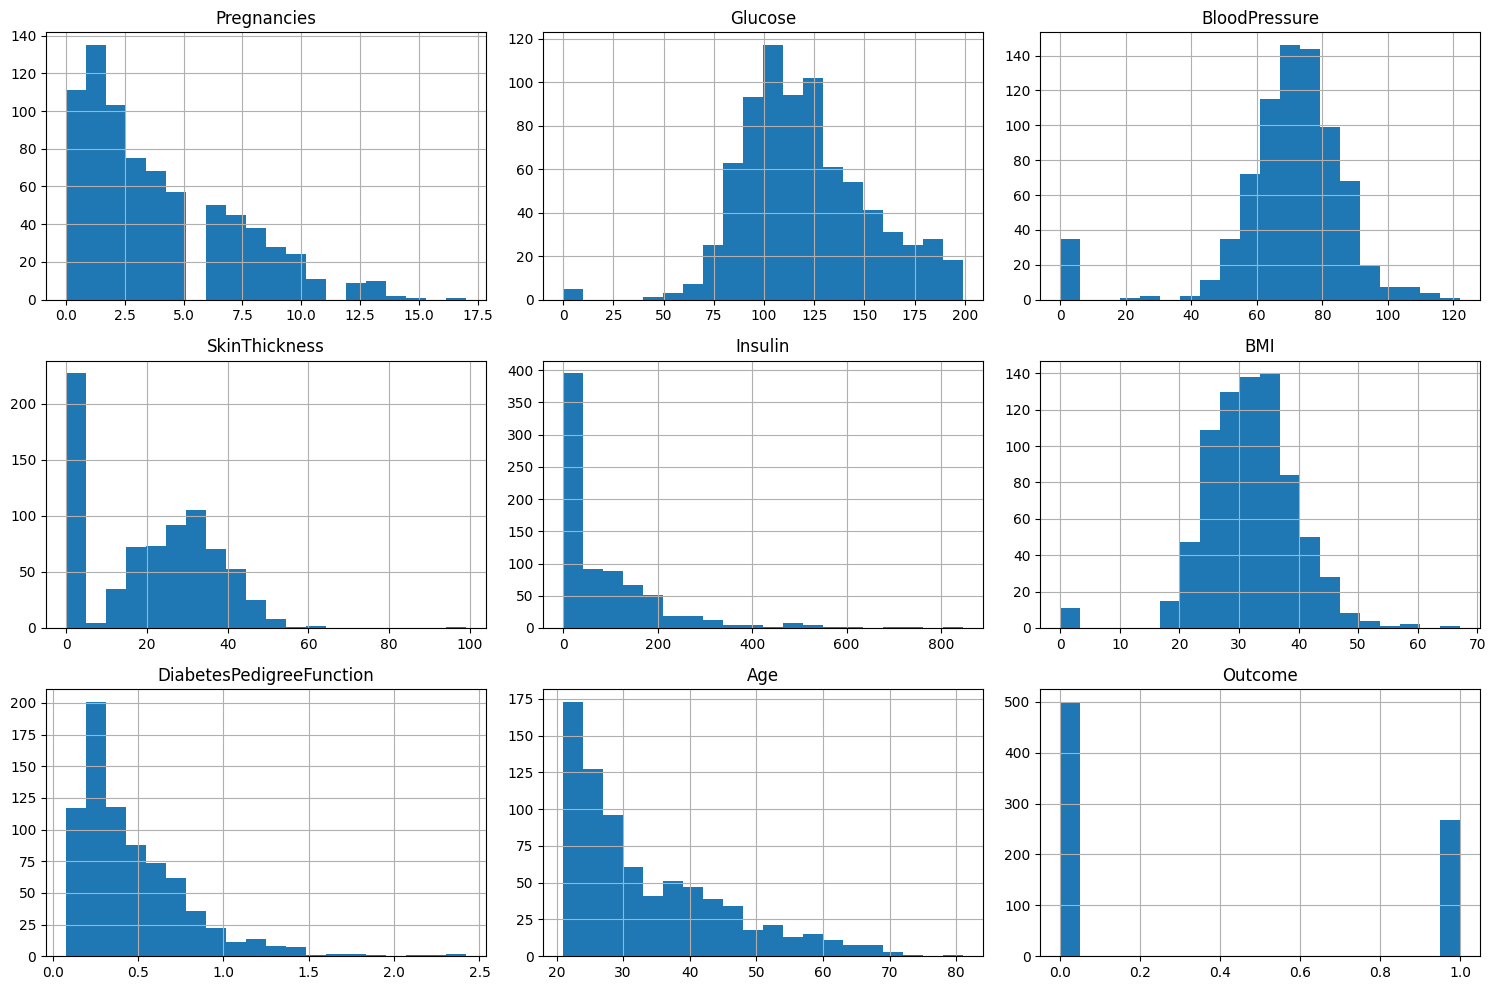

In [7]:
# 1. 기초 통계 확인
summary_stats = df.describe()

# 2. 범주형 변수 탐색
categorical_columns = df.select_dtypes(include=['int64']).columns
categorical_summary = df[categorical_columns].describe()

# 3. 수치형 변수 분포 탐색 (히스토그램 생성)
import matplotlib.pyplot as plt

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_columns].hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

## 3. KNN 구현 & 파라미터 튜닝


In [11]:
from pycaret import classification


# PyCaret setup
clf = classification.setup(data=df, target='Outcome', session_id=42)

,Description,Value
0,Session id,42
1,Target,Outcome
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(537, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [15]:
knn = classification.create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6296,0.7466,0.5789,0.4783,0.5238,0.2253,0.2280
1,0.6667,0.7579,0.5789,0.5238,0.5500,0.2863,0.2872
2,0.7778,0.7481,0.4737,0.8182,0.6000,0.4609,0.4939
3,0.6667,0.7000,0.4211,0.5333,0.4706,0.2322,0.2357
4,0.7222,0.7842,0.5263,0.6250,0.5714,0.3682,0.3711
5,0.7037,0.7624,0.3684,0.6364,0.4667,0.2812,0.3013
6,0.6852,0.6910,0.3684,0.5833,0.4516,0.2463,0.2591
7,0.7736,0.7944,0.7778,0.6364,0.7000,0.5211,0.5279
8,0.7170,0.7548,0.5556,0.5882,0.5714,0.3604,0.3607


In [16]:
# 하이퍼파라미터 튜닝"
tuned_knn = classification.tune_model(knn)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8333,0.8880,0.6316,0.8571,0.7273,0.6112,0.6260
1,0.7778,0.8534,0.4211,0.8889,0.5714,0.4462,0.5029
2,0.7407,0.8526,0.4211,0.7273,0.5333,0.3710,0.3976
3,0.7593,0.7985,0.4737,0.7500,0.5806,0.4236,0.4456
4,0.7778,0.7714,0.6316,0.7059,0.6667,0.5008,0.5025
5,0.7407,0.8000,0.4211,0.7273,0.5333,0.3710,0.3976
6,0.6852,0.7857,0.2632,0.6250,0.3704,0.2045,0.2385
7,0.8868,0.8317,0.7222,0.9286,0.8125,0.7332,0.7451
8,0.7358,0.7238,0.3333,0.7500,0.4615,0.3193,0.3654


Fitting 10 folds for each of 10 candidates, totalling 100 fits


## 4. 평가

각 metric에 대한 평가
- Acc : 77%
- F1 : 57%

---
# 2. K-Means 과제

## 1. 데이터 로드

In [17]:
# 본인 데이터 저장 경로에 맞춰 수정하기

df = pd.read_csv("Live.csv")
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


## 2. 데이터 전처리/EDA

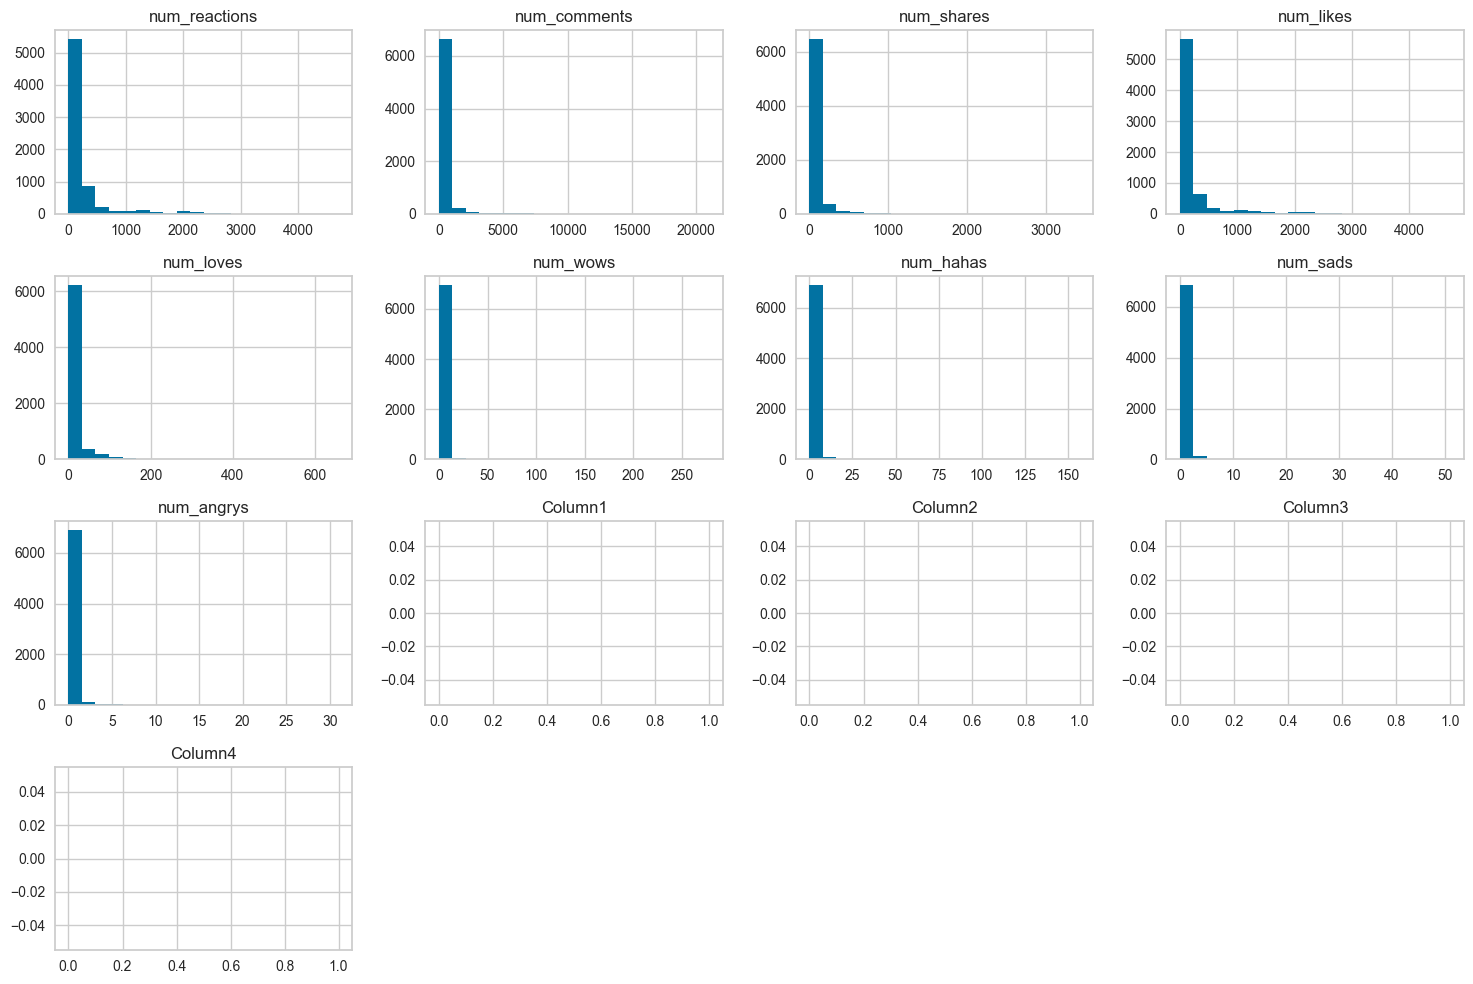

In [18]:
# 1. 기초 통계 확인
summary_stats = df.describe()

# 2. 범주형 변수 탐색
categorical_columns = df.select_dtypes(include=['int64']).columns
categorical_summary = df[categorical_columns].describe()

# 3. 수치형 변수 분포 탐색 (히스토그램 생성)
import matplotlib.pyplot as plt

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_columns].hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

## 3. K-Means 구현 & 파라미터 튜닝

In [19]:
from pycaret import clustering

clf = clustering.setup(data=df, session_id=78)

,Description,Value
0,Session id,78
1,Original data shape,"(7050, 16)"
2,Transformed data shape,"(7050, 13923)"
3,Numeric features,13
4,Categorical features,3
5,Rows with missing values,100.0%
6,Preprocess,True
7,Imputation type,simple
8,Numeric imputation,mean
9,Categorical imputation,mode


In [21]:
kmeans = clustering.create_model('kmeans', num_clusters=5)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7644,7216.9297,0.6400,0,0,0


In [22]:
clustering.plot_model(kmeans, plot='cluster')

## 4. 평가

In [23]:
clustered_data = clustering.predict_model(kmeans, data=df)

In [24]:
clustered_data

,status_id_246675545449582_1649696485147474,status_id_246675545449582_1649426988507757,status_id_246675545449582_1648730588577397,status_id_246675545449582_1648576705259452,status_id_246675545449582_1645700502213739,status_id_246675545449582_1645650162218773,status_id_246675545449582_1645564175560705,status_id_246675545449582_1644824665634656,status_id_246675545449582_1644655795651543,status_id_246675545449582_1638788379571618,...,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Cluster
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,529.0,512.0,262.0,432.0,92.0,3.0,1.0,1.0,0.0,Cluster 0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,150.0,0.0,0.0,150.0,0.0,0.0,0.0,0.0,0.0,Cluster 0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,227.0,236.0,57.0,204.0,21.0,1.0,1.0,0.0,0.0,Cluster 0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,111.0,0.0,0.0,111.0,0.0,0.0,0.0,0.0,0.0,Cluster 0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,213.0,0.0,0.0,204.0,9.0,0.0,0.0,0.0,0.0,Cluster 0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,89.0,0.0,0.0,89.0,0.0,0.0,0.0,0.0,0.0,Cluster 0
7046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.0,0.0,0.0,14.0,1.0,0.0,1.0,0.0,0.0,Cluster 0
7047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,Cluster 0
7048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,351.0,12.0,22.0,349.0,2.0,0.0,0.0,0.0,0.0,Cluster 0
